# sudhanshu kumar 
data science topic 1.2 

# LetsGrowMore - Nov2021 BATCH

data set-https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

# importing important library

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# load  the data file

In [2]:
dataset_link = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
data = pd.read_csv(dataset_link)
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# initialise all value zero

In [3]:
data.isnull().sum()
# No null values so we can proceed

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [4]:
data['Date'] = pd.to_datetime(data['Date'])

# Analysis of Data for better understanding

In [26]:
import numpy as np

In [28]:
df

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...,...
2030,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [37]:
df.tail()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2034,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [54]:
len(df)

2035

In [8]:
df_close = df['Close']
df_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [5]:
df = data.sort_values('Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [6]:
df.reset_index(inplace=True)

# visualizing the Data

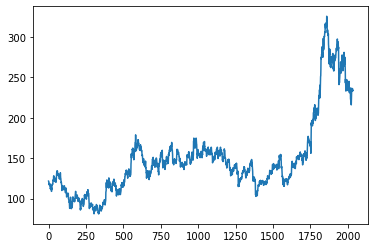

In [7]:
plt.plot(df['Close'])

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))

In [10]:
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# The scaling and transformation is complete as you can see it above in an array

Now, it is time to split the data

In [11]:
training_size = int(len(df_close)*0.70)
test_size = len(df_close) - training_size
train, test = df_close[0: training_size,:], df_close[training_size : len(df_close),:1]

In [12]:
# Let us convert the array values previously calculated into a matrix
def create_mat(ds, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
time_step = 100
X_train, y_train = create_mat(train, time_step)
X_test, y_test = create_mat(test, time_step)

In [14]:
y_train.shape

(1323,)

In [16]:
X_train.shape

(1323, 100)

In [17]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM MODEL OF DATA

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train, y_train, validation_split=0.1, epochs= 60, batch_size=64, verbose = 1)

Epoch 1/60
19/19 [==============================] - 7s 180ms/step - loss: 0.0104 - val_loss: 0.0012
Epoch 2/60
19/19 [==============================] - 3s 133ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 3/60
19/19 [==============================] - 3s 148ms/step - loss: 9.2646e-04 - val_loss: 0.0011
Epoch 4/60
19/19 [==============================] - 3s 136ms/step - loss: 8.0498e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 2s 126ms/step - loss: 8.0747e-04 - val_loss: 0.0010
Epoch 6/60
19/19 [==============================] - 2s 124ms/step - loss: 7.6348e-04 - val_loss: 9.8940e-04
Epoch 7/60
19/19 [==============================] - 2s 124ms/step - loss: 7.3455e-04 - val_loss: 9.4994e-04
Epoch 8/60
19/19 [==============================] - 2s 123ms/step - loss: 7.1391e-04 - val_loss: 9.1861e-04
Epoch 9/60
19/19 [==============================] - 3s 134ms/step - loss: 6.8957e-04 - val_loss: 8.7542e-04
Epoch 10/60
19/19 [==============================] - 2s 

# PREDICTION PART

In [21]:
predictions = model.predict(X_test)

In [22]:
# performing inverse transform on predictions
inv_predictions = scaler.inverse_transform(predictions)

In [23]:
inv_predictions

array([[143.00577 ],
       [143.14758 ],
       [142.13916 ],
       [139.28812 ],
       [137.70375 ],
       [137.39685 ],
       [138.88033 ],
       [140.59035 ],
       [140.8194  ],
       [140.20448 ],
       [139.85574 ],
       [141.18745 ],
       [142.06163 ],
       [143.71237 ],
       [145.95238 ],
       [143.50044 ],
       [140.81094 ],
       [140.6189  ],
       [141.55423 ],
       [147.1111  ],
       [151.58347 ],
       [153.27968 ],
       [153.07591 ],
       [150.60864 ],
       [150.5848  ],
       [150.63496 ],
       [151.26247 ],
       [153.10477 ],
       [153.72488 ],
       [153.51746 ],
       [153.82811 ],
       [152.55556 ],
       [149.16443 ],
       [143.3388  ],
       [140.17996 ],
       [139.63644 ],
       [140.10995 ],
       [139.27405 ],
       [136.70543 ],
       [132.76025 ],
       [130.27269 ],
       [129.32845 ],
       [127.36212 ],
       [126.66761 ],
       [124.58213 ],
       [121.82779 ],
       [121.19744 ],
       [121.0

# let us check mean squared error for our model

In [24]:
import math
from sklearn.metrics import mean_squared_error

In [25]:
mse = math.sqrt(mean_squared_error(y_test, predictions))
print("The Mean Squared Error for above model is: ", mse)

The Mean Squared Error for above model is:  0.043301064038700356


In [36]:
math.sqrt(mean_squared_error(y_test,predictions))

0.043301064038700356

In [41]:
temp_input=list(X_test)
temp_input=temp_input[0].tolist()

In [42]:
temp_input

[[0.16217320261437906],
 [0.15951797385620914],
 [0.16707516339869277],
 [0.15992647058823523],
 [0.1605392156862745],
 [0.16441993464052285],
 [0.1668709150326797],
 [0.16932189542483655],
 [0.16074346405228757],
 [0.1597222222222222],
 [0.1640114379084967],
 [0.15727124183006536],
 [0.14705882352941174],
 [0.14460784313725483],
 [0.15175653594771238],
 [0.15441176470588236],
 [0.15216503267973858],
 [0.14848856209150324],
 [0.15522875816993464],
 [0.1576797385620915],
 [0.16217320261437906],
 [0.16094771241830064],
 [0.1633986928104575],
 [0.15931372549019607],
 [0.1597222222222222],
 [0.1611519607843137],
 [0.16666666666666663],
 [0.15747549019607843],
 [0.1537990196078431],
 [0.14848856209150324],
 [0.15114379084967322],
 [0.15032679738562088],
 [0.1515522875816993],
 [0.15645424836601307],
 [0.16033496732026142],
 [0.1566584967320261],
 [0.15686274509803916],
 [0.1774918300653595],
 [0.1797385620915033],
 [0.17442810457516345],
 [0.19281045751633985],
 [0.1860702614379085],
 [0.18

THANK YOU
